# Volume 4: Anisotropic Diffusion
    <Name> Dallin Stewart
    <Class> ACME 002
    <Date> The only way to create some thing that nobody hates is to ensure that it can’t be loved either.

In [20]:
import numpy as np
from numpy.random import randint
from matplotlib import cm, pyplot as plt
from imageio.v3 import imread, imwrite
from numpy.random import randint
from numpy.linalg import norm
plt.rcParams['figure.figsize'] = (16,10)

# Problem 1

Complete the following function, by implementing the anisotropic diffusion algorithm found in 10.1 for black and white images.
Run the function on coke_balloon.jpg. Show the original image and the diffused image for σ = .1,
λ = .25, N = 5, 20, 100.

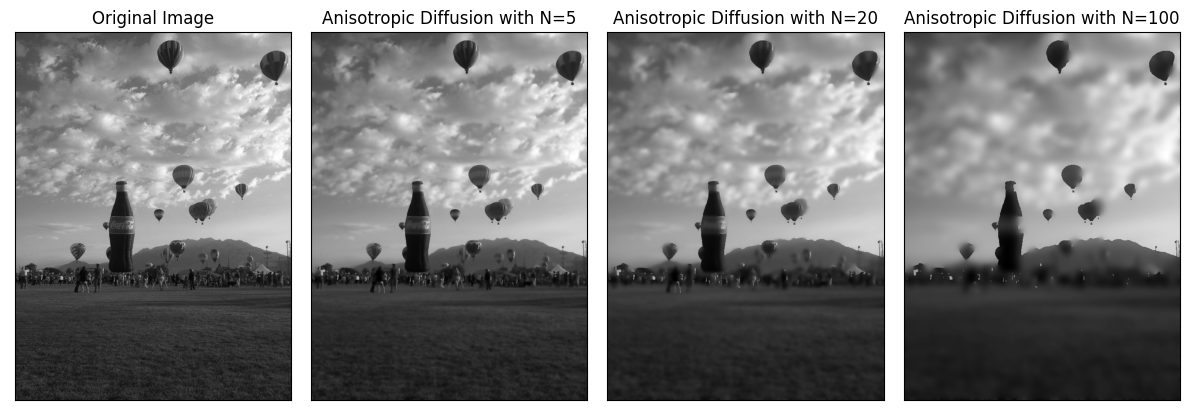

In [24]:
def anisdiff_bw(U, N, lambda_, g):
    """ 
    Run the Anisotropic Diffusion differencing scheme
    on the array U of grayscale values for an image.
    Perform N iterations, use the function g
    to limit diffusion across boundaries in the image.
    Operate on U inplace to optimize performance. 
    """
    # pad U
    U = np.pad(U, 1, mode='edge')

    for _ in range(N):
        U_ = U[1:-1, 1:-1]
        U[1:-1, 1:-1] = U_ + lambda_ * (g(np.abs(U[1:-1, 2:] - U_)) * (U[1:-1, 2:] - U_) \
                                        + g(np.abs(U[1:-1, :-2] - U_)) * (U[1:-1, :-2] - U_) \
                                        + g(np.abs(U[2:, 1:-1] - U_)) * (U[2:, 1:-1] - U_) \
                                        + g(np.abs(U[:-2, 1:-1] - U_)) * (U[:-2, 1:-1] - U_))
    
    return U[1:-1, 1:-1]


# initialize parameters
sigma = 0.1
lambda_ = 0.25
n = [5, 20, 100]
g = lambda x: np.exp(-(x/sigma)**2)
U = imread("/mnt/c/users/dalli/source/acme_senior/vl4labs/AnisotropicDiffusion/coke_balloon.jpg", mode="F") * 1./255

# create original image
plt.figure(figsize=(12, 20))
plt.subplot(1, 4, 1)
plt.imshow(U, cmap=cm.gray)
plt.title("Original Image")
plt.xticks([])
plt.yticks([])

# show anisotropic diffusion results
for i, N in enumerate(n):
    _U = U.copy()
    _U = anisdiff_bw(_U, N, lambda_, g)
    plt.subplot(1, 4, i+2)
    plt.imshow(_U, cmap=cm.gray)
    plt.title(f"Anisotropic Diffusion with N={N}")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

# Problem 2

Complete the following function to process a colored image.
Run the function on balloons_color.jpg. Show the original image and the diffused image for
σ = .1, λ = .25, N = 5, 20, 100.

(802, 602, 3)
(800, 600, 3)
(800, 600)
(800, 600, 3)
(800, 600)
(800, 600, 3)
(800, 600)
(800, 600, 3)
(800, 600)
(800, 600, 3)
(800, 600)
(802, 602, 3)
(800, 600, 3)
(800, 600)
(800, 600, 3)
(800, 600)
(800, 600, 3)
(800, 600)
(800, 600, 3)
(800, 600)
(800, 600, 3)
(800, 600)
(800, 600, 3)
(800, 600)
(800, 600, 3)
(800, 600)
(800, 600, 3)
(800, 600)
(800, 600, 3)
(800, 600)
(800, 600, 3)
(800, 600)
(800, 600, 3)
(800, 600)
(800, 600, 3)
(800, 600)
(800, 600, 3)
(800, 600)
(800, 600, 3)
(800, 600)
(800, 600, 3)
(800, 600)
(800, 600, 3)
(800, 600)
(800, 600, 3)
(800, 600)
(800, 600, 3)
(800, 600)
(800, 600, 3)
(800, 600)
(800, 600, 3)
(800, 600)
(802, 602, 3)
(800, 600, 3)
(800, 600)
(800, 600, 3)
(800, 600)
(800, 600, 3)
(800, 600)
(800, 600, 3)
(800, 600)
(800, 600, 3)
(800, 600)
(800, 600, 3)
(800, 600)
(800, 600, 3)
(800, 600)
(800, 600, 3)
(800, 600)
(800, 600, 3)
(800, 600)
(800, 600, 3)
(800, 600)
(800, 600, 3)
(800, 600)
(800, 600, 3)
(800, 600)
(800, 600, 3)
(800, 600)
(800, 60

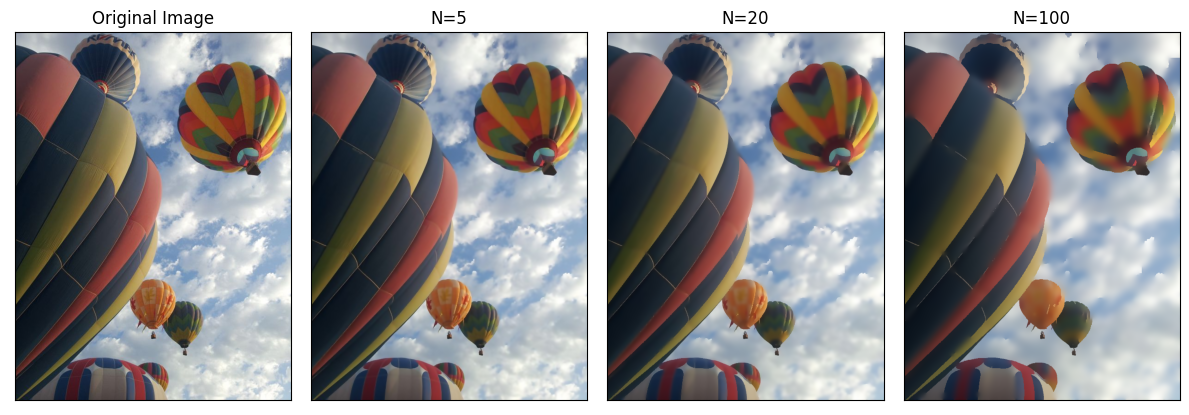

In [34]:
def anisdiff_color(U, N, lambda_, g):
    """ 
    Run the Anisotropic Diffusion differencing scheme
    on the array U of grayscale values for an image.
    Perform N iterations, use the function g = e^{-x^2/sigma^2}
    to limit diffusion across boundaries in the image.
    Operate on U inplace to optimize performance. 
    """
    # pad U
    U = np.pad(U, 1, mode='edge')[:,:,1:4]
    print(U.shape)
    norm1 = lambda x: np.sqrt(np.sum(x**2, axis=2, keepdims=True))

    for _ in range(N):
        U_ = U[1:-1, 1:-1]
        U[1:-1, 1:-1] = U_ + lambda_ * (
              g(norm1(U[1:-1, 2:] - U_)) * (U[1:-1, 2:] - U_) \
            + g(norm1(U[1:-1, :-2] - U_)) * (U[1:-1, :-2] - U_) \
            + g(norm1(U[2:, 1:-1] - U_)) * (U[2:, 1:-1] - U_) \
            + g(norm1(U[:-2, 1:-1] - U_)) * (U[:-2, 1:-1] - U_)
            )
    
    return U[1:-1, 1:-1]

# initialize parameters
sigma = 0.1
lambda_ = 0.25
n = [5, 20, 100]
g = lambda x: np.exp(-(x/sigma)**2)
U = imread("/mnt/c/users/dalli/source/acme_senior/vl4labs/AnisotropicDiffusion/balloons_color.jpg") * 1./255

# create original image
plt.figure(figsize=(12, 20))
plt.subplot(1, 4, 1)
plt.imshow(U)
plt.title("Original Image")
plt.xticks([])
plt.yticks([])

# show anisotropic diffusion results
for i, N in enumerate(n):
    _U = U.copy()
    _U = anisdiff_color(_U, N, lambda_, g)
    plt.subplot(1, 4, i+2)
    plt.imshow(_U)
    plt.title(f"N={N}")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

# Problem 3

Run anisdiff_bw() on the noisy image with σ = .1, λ = .25, N = 20. Display the
original image and the noisy image. Explain why anisotropic diffusion does not smooth out the
noise.

Use the following code to add noise to your grayscale image.

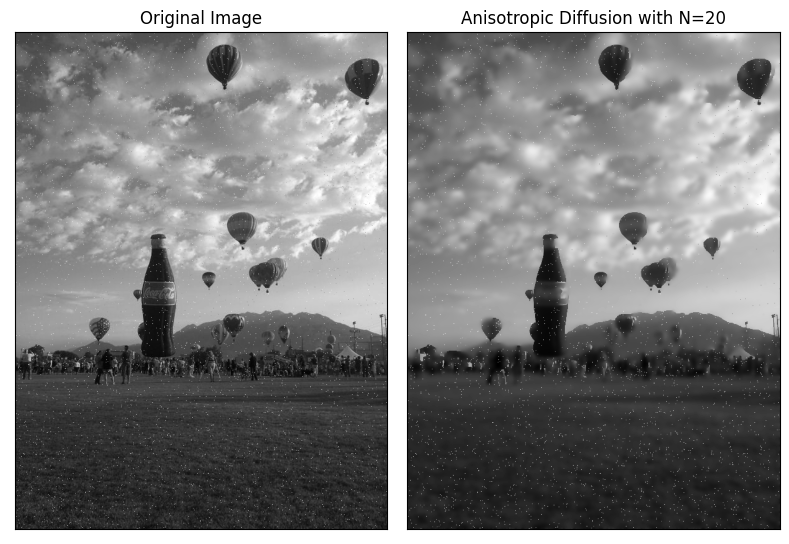

In [38]:
image = imread('/mnt/c/users/dalli/source/acme_senior/vl4labs/AnisotropicDiffusion/coke_balloon.jpg', mode="F")*1./255
x, y = image.shape
for i in range(x*y//100):
    image[randint(x),randint(y)] = (127 + randint(127))*1./255

# create original image
plt.figure(figsize=(8, 12))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap=cm.gray)
plt.xticks([])
plt.yticks([])
plt.title("Original Image")

# initialize parameters
sigma = 0.1
lambda_ = 0.25
n = 20
g = lambda x: np.exp(-(x/sigma)**2)

# show anisotropic diffusion results
_U = image.copy()
_U = anisdiff_bw(_U, n, lambda_, g)
plt.subplot(1, 2, 2)
plt.imshow(_U, cmap=cm.gray)
plt.title(f"Anisotropic Diffusion with N={n}")
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

Anisotropic diffusion may not effectively smooth out this type of noise because its edge-stopping function cannot distinguish between the random noise from actual edges, limiting its ability to selectively suppress the noise while preserving image features.

# Problem 4

Implement the minimum-biased finite diverence scheme described above. Add noise to
balloons_color.jpg using the provided code below, and clean it using your implementation.
Show the original image, the noised image, and the cleaned image.

In [56]:
def anisdiff_denoise(U, N, lambda_, g):
    """ 
    Run the Anisotropic Diffusion differencing scheme
    on the array U of grayscale values for an image.
    Perform N iterations, use the function g = e^{-x^2/sigma^2}
    to limit diffusion across boundaries in the image.
    Operate on U inplace to optimize performance. 
    """
    # pad U
    U = np.pad(U, 1, mode='edge')[:,:,1:4]
    norm1 = lambda x: np.sqrt(np.sum(x**2, axis=2, keepdims=True))

    for _ in range(N):
        g = np.argsort([norm1(U[1:-1, 2:]), 
                      norm1(U[1:-1, :-2]),
                      norm1(U[2:, 1:-1]),
                      norm1(U[:-2, 1:-1])])[:2, :, :, 0]
        if len(g.shape) == 4:
            g = np.squeeze(g, axis=-1)
        g = np.mean(g, axis=0)
        
        U[1:-1, 1:-1] = U[1:-1, 1:-1] + lambda_ * g[:, :, np.newaxis] * (U[1:-1, 2:] + 
                                                                        U[1:-1, :-2] + 
                                                                        U[2:, 1:-1] + 
                                                                        U[:-2, 1:-1] - 
                                                                        4*U[1:-1, 1:-1])
    return U[1:-1, 1:-1]

(802, 602, 3)


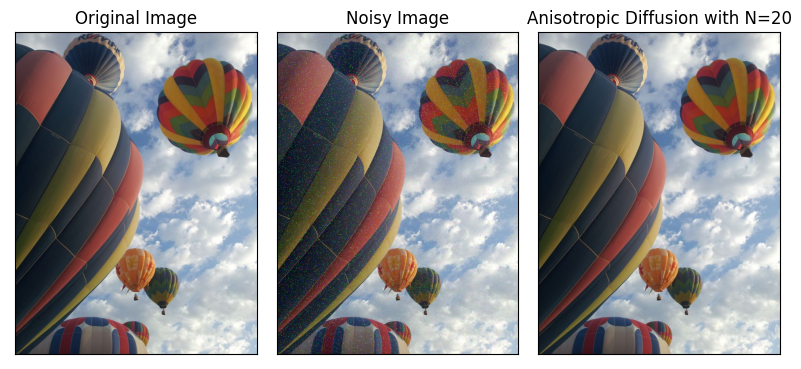

In [57]:
image = imread('/mnt/c/users/dalli/source/acme_senior/vl4labs/AnisotropicDiffusion/balloons_color.jpg') * 1./255
noisy_img = imread('/mnt/c/users/dalli/source/acme_senior/vl4labs/AnisotropicDiffusion/balloons_color.jpg') *1./255
x,y,z = image.shape
for dim in range(z):
    for i in range(x*y//30):
        # Assign a random value to a random place
        noisy_img[randint(x),randint(y),dim] = (127 + randint(127)) /255.

# create original image
plt.figure(figsize=(8, 12))
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.title("Original Image")

# show noisy image
plt.subplot(1, 3, 2)
plt.imshow(noisy_img)
plt.xticks([])
plt.yticks([])
plt.title("Noisy Image")

# initialize parameters
lambda_ = 0.25
n = 20
g = None
_U = image.copy()
_U = anisdiff_denoise(_U, n, lambda_, g)

# show anisotropic diffusion results
plt.subplot(1, 3, 3)
plt.imshow(_U)
plt.title(f"Anisotropic Diffusion with N={n}")
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()